In [1]:
intro.dat <- read.table(
    "http://www.maths.dur.ac.uk/~dma0je/Data/intro-asml2.dat", 
    header=TRUE
    )

head(intro.dat)

,x,y
,<dbl>,<dbl>
1,-0.4720543,-1.3495412
2,-2.0489395,0.3468624
3,-1.3263892,-1.3380228
4,1.7823161,-0.9631754
5,0.5540121,0.2210657
6,-0.8238523,0.1000506


In [2]:
k3 <- kmeans(intro.dat, centers=3)
k3$centers
k3$cluster[1:20]

,x,y
1,2.1752499,3.826271
2,-0.8169763,2.996031
3,0.2621725,-1.267684


1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3

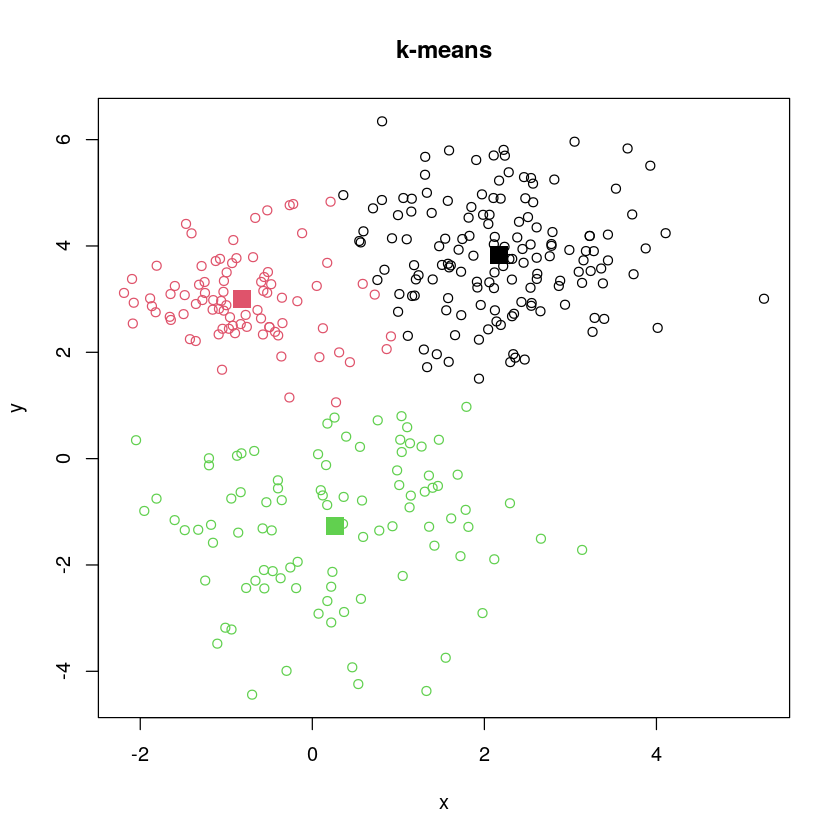

In [3]:
plot(intro.dat, col=k3$cluster, main="k-means")
   
points(k3$centers, pch=15, cex=2, col=c(1,2,3))

In [4]:
k3$withinss 
k3$tot.withinss      # SS_within
k3$totss             # SS_total
k3$betweenss         # SS_between

[1] 258.54463  89.49661 270.39234

[1] 618.4336

[1] 2681.893

[1] 2063.459

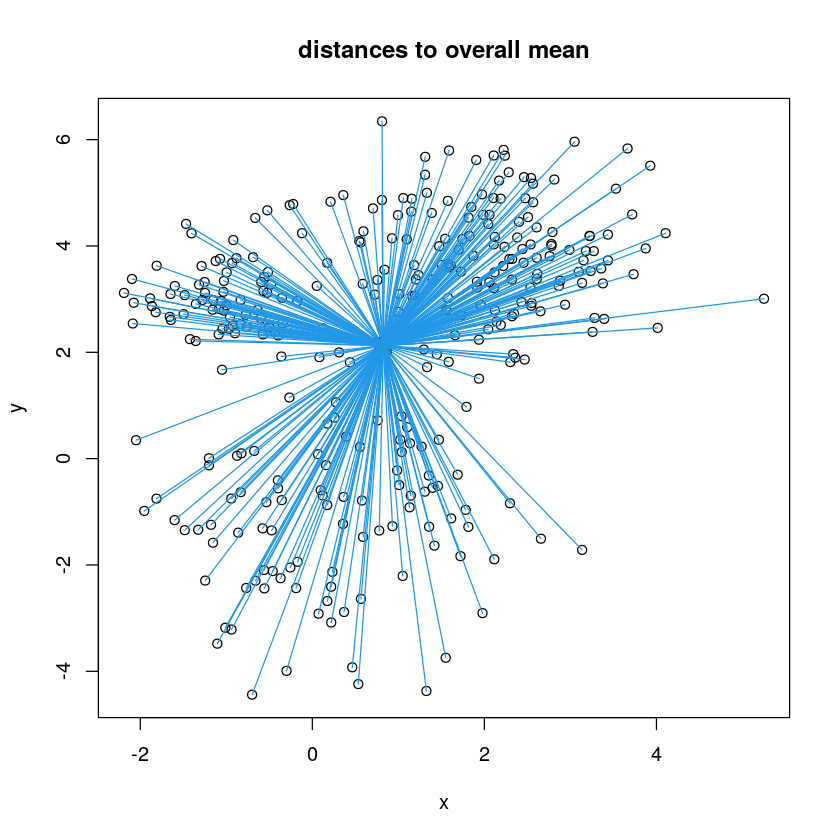

In [5]:
m <- colMeans(intro.dat)
plot(intro.dat,  main="distances to overall mean")
points(m[1], m[2], pch=15, cex=2, col=1)
     
n<-dim(intro.dat)[1]  
for (j in 1:n){
  segments(intro.dat[j,1], intro.dat[j,2],  m[1], m[2], col=4 )
}

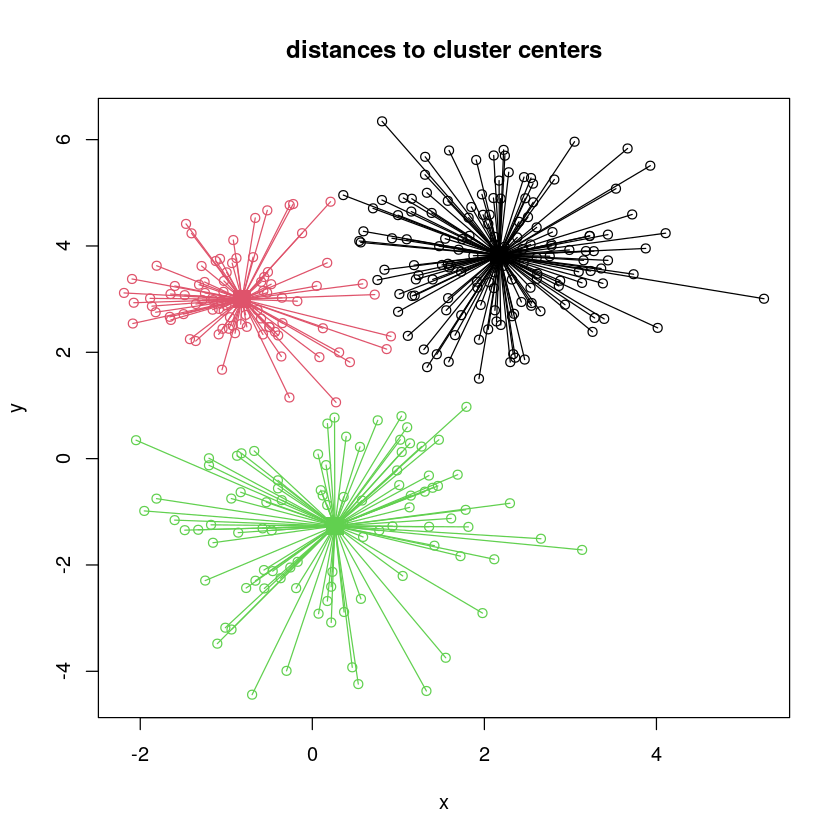

In [6]:
plot(intro.dat, col=k3$cluster, main="distances to cluster centers")
points(k3$centers, pch=15, cex=2, col=c(1,2,3))

for (j in 1:n){
  segments(intro.dat[j,1], intro.dat[j,2], k3$centers[k3$cluster[j],1],  k3$centers[k3$cluster[j],2], 
    col=k3$cluster[j]  ) 
 } 

In [7]:
set.seed(30)
k3l<- kmeans(intro.dat, centers=3, algorithm="Lloyd")
k3l$centers
k3l$tot.withinss
k3l$iter

k3<- kmeans(intro.dat, centers=3, algorithm="Hartigan-Wong")
k3$centers
k3$tot.withinss
k3$iter

,x,y
1,2.1752499,3.826271
2,-0.8169763,2.996031
3,0.2621725,-1.267684


[1] 618.4336

[1] 6

,x,y
1,0.3186348,-2.7080006
2,1.0735845,3.5451444
3,0.2035980,-0.3912679


[1] 1013.796

[1] 2

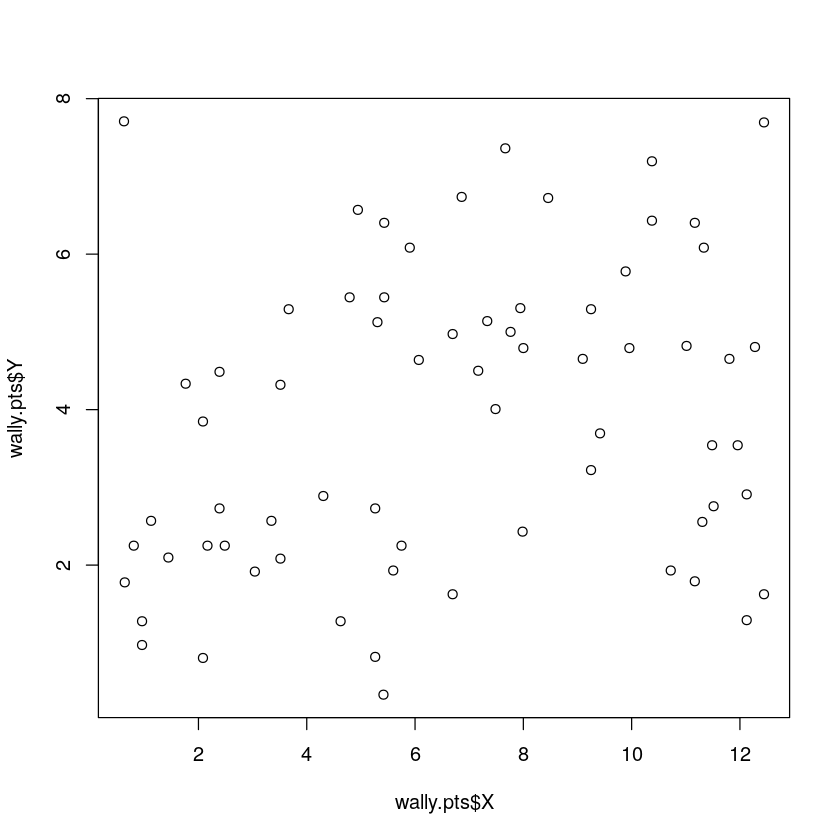

In [8]:
wally.pts = read.csv('http://www.randalolson.com/wp-content/uploads/wheres-waldo-locations.csv')
plot(wally.pts$X, wally.pts$Y)

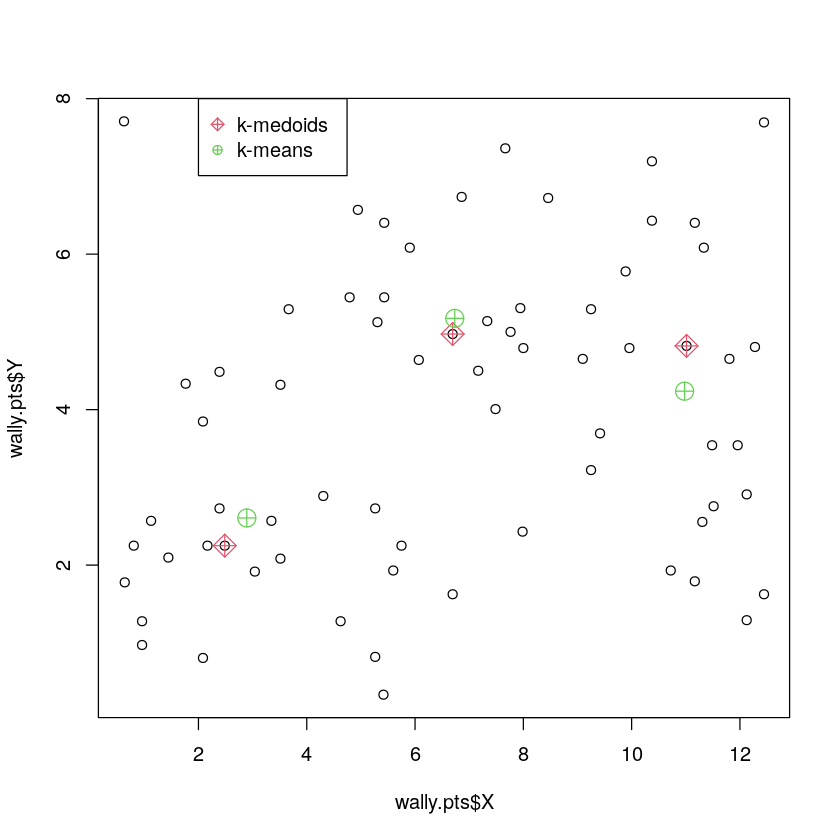

In [9]:
library(clue)
wally.kmed<- kmedoids(dist(wally.pts[,c("X","Y")]), k=3)
plot(wally.pts$X, wally.pts$Y)
points(wally.pts$X[wally.kmed$medoid_ids], wally.pts$Y[wally.kmed$medoid_ids],  col=2, pch=9, cex=1.8)
wally.kmean <- kmeans(wally.pts[,c("X","Y")], centers=3)
points(wally.kmean$centers, col=3, pch=10, cex=2)
legend(2,8, legend=c("k-medoids", "k-means"),  pch=c(9,10), col=c(2,3)) 

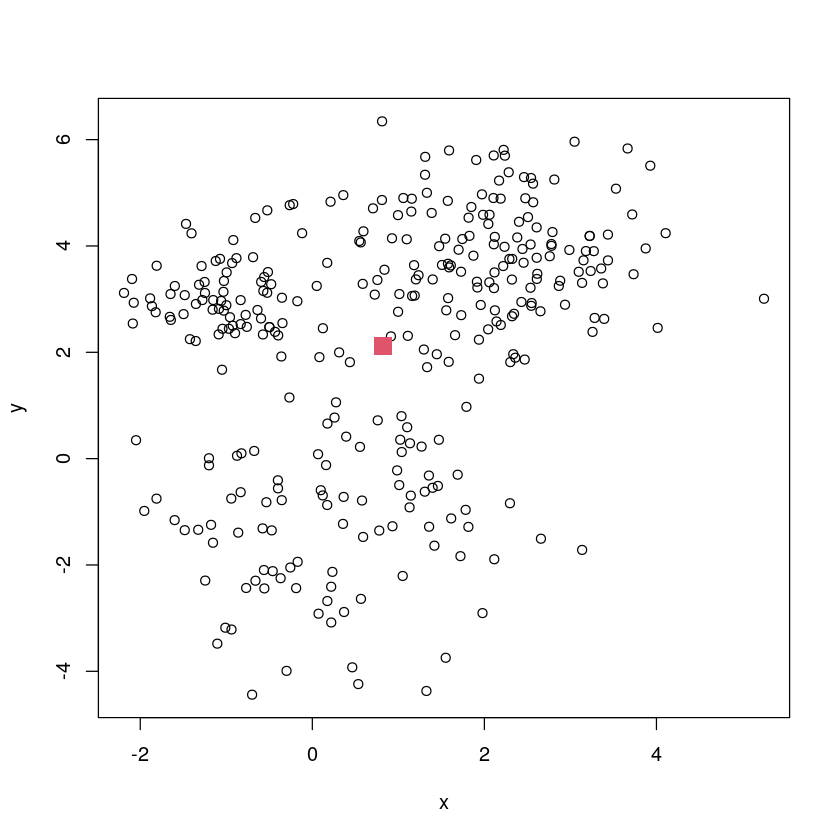

In [10]:
m <- colMeans(intro.dat)
plot(intro.dat)
points(m[1], m[2], col=2,  pch=15, cex=2)

In [11]:
Sigma <- var(intro.dat)
Sigma

,x,y
x,2.439586,1.205168
y,1.205168,5.967602


In [12]:
R <- cor(intro.dat)
R

,x,y
x,1.0000000,0.3158564
y,0.3158564,1.0000000


Loading required package: animation



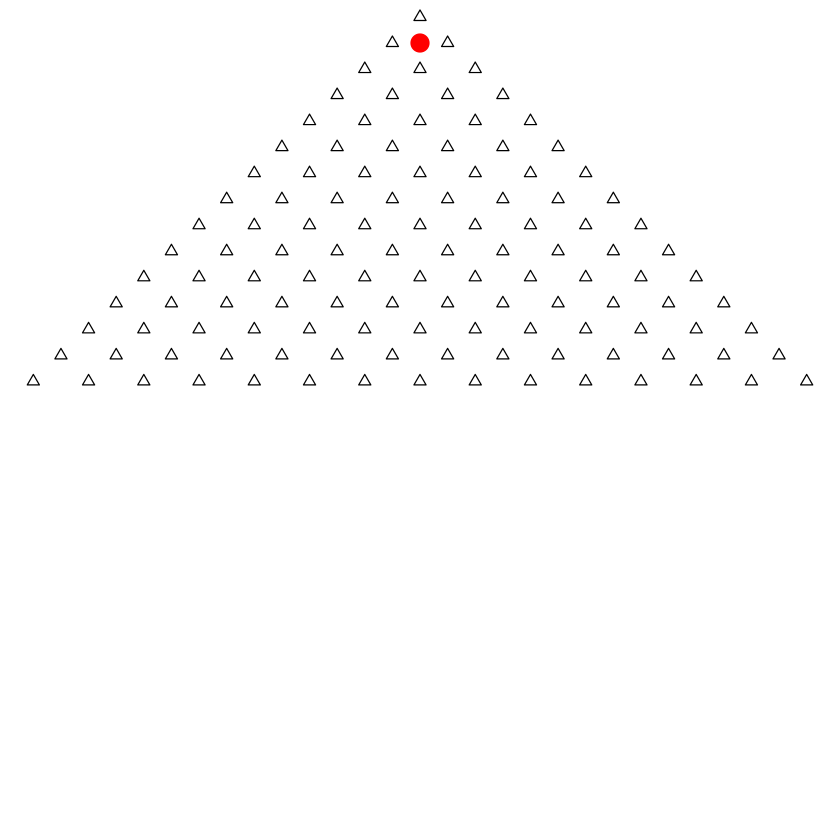

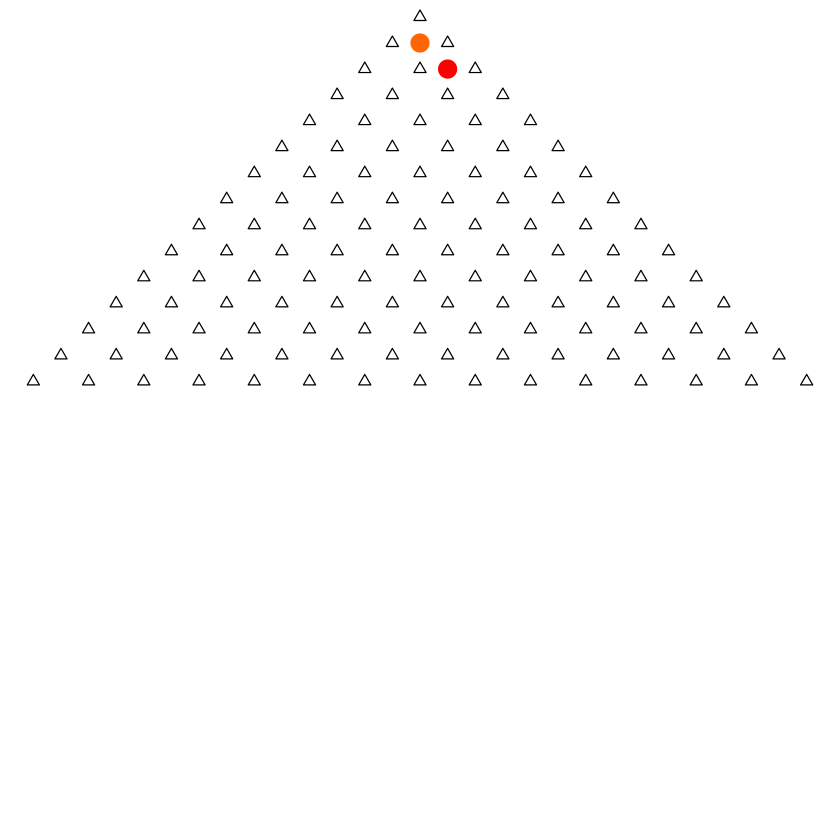

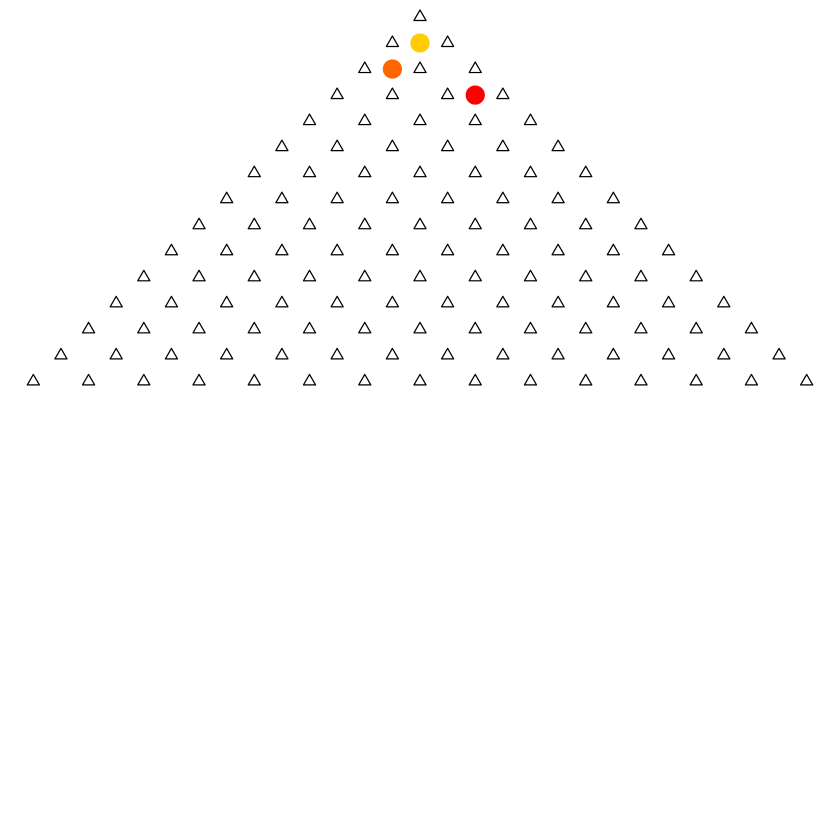

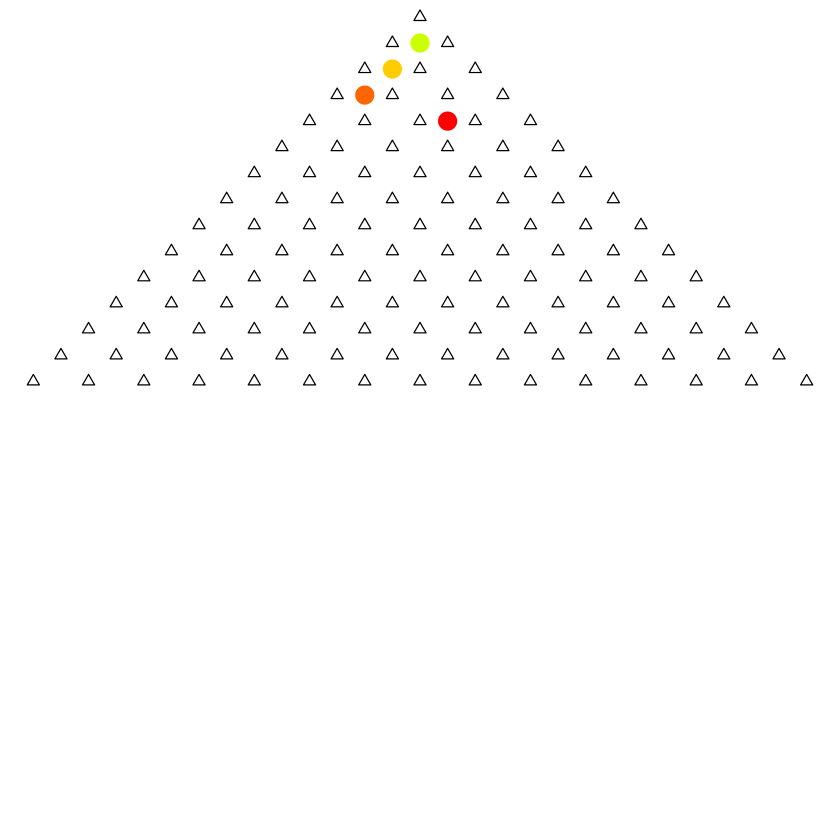

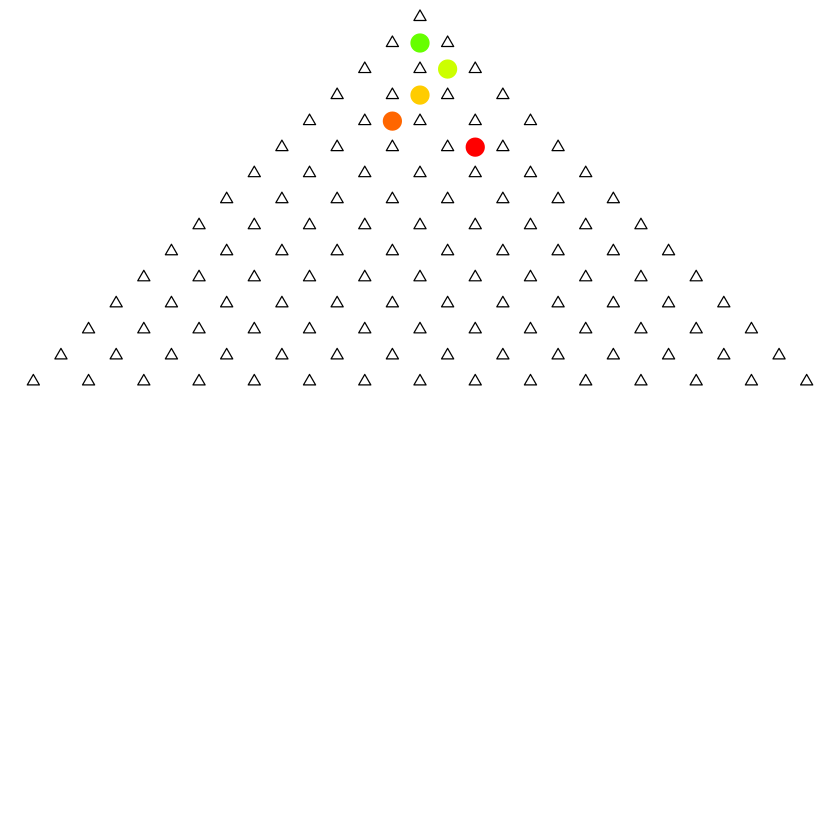

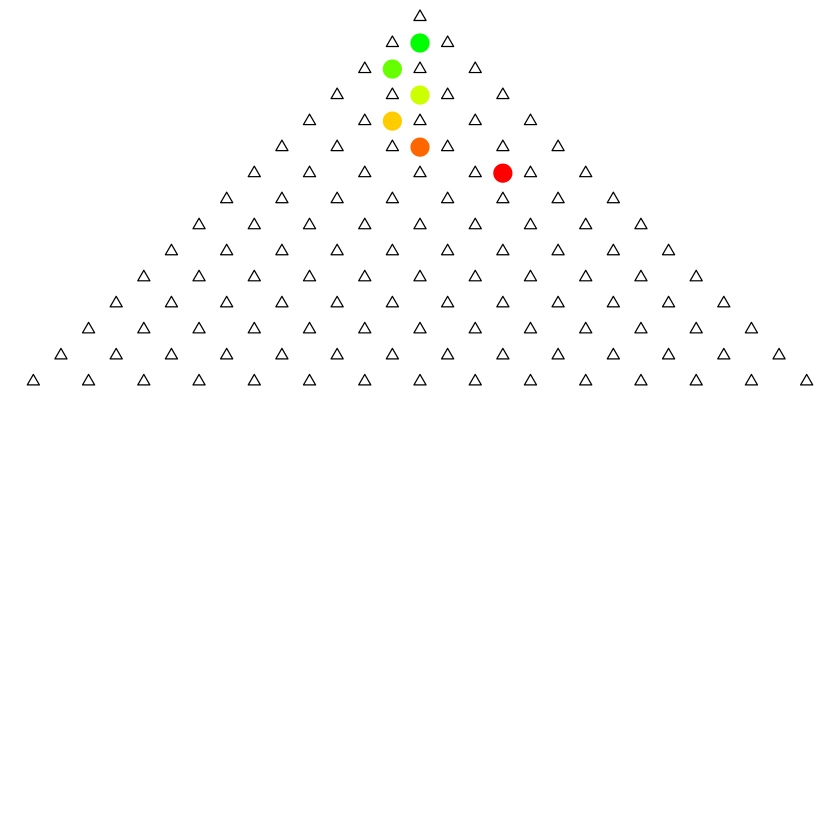

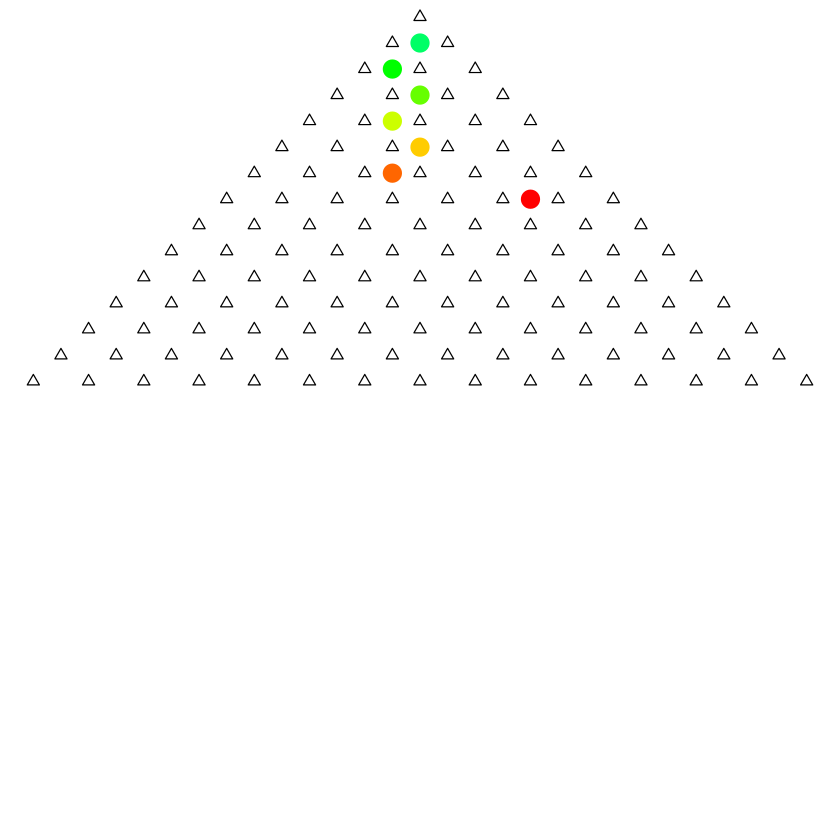

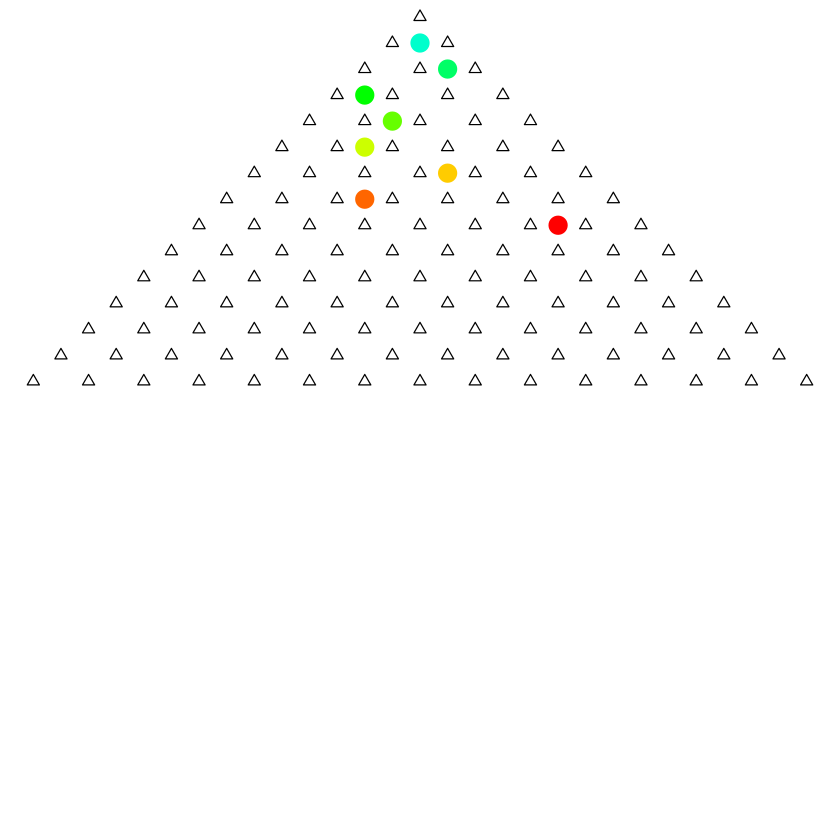

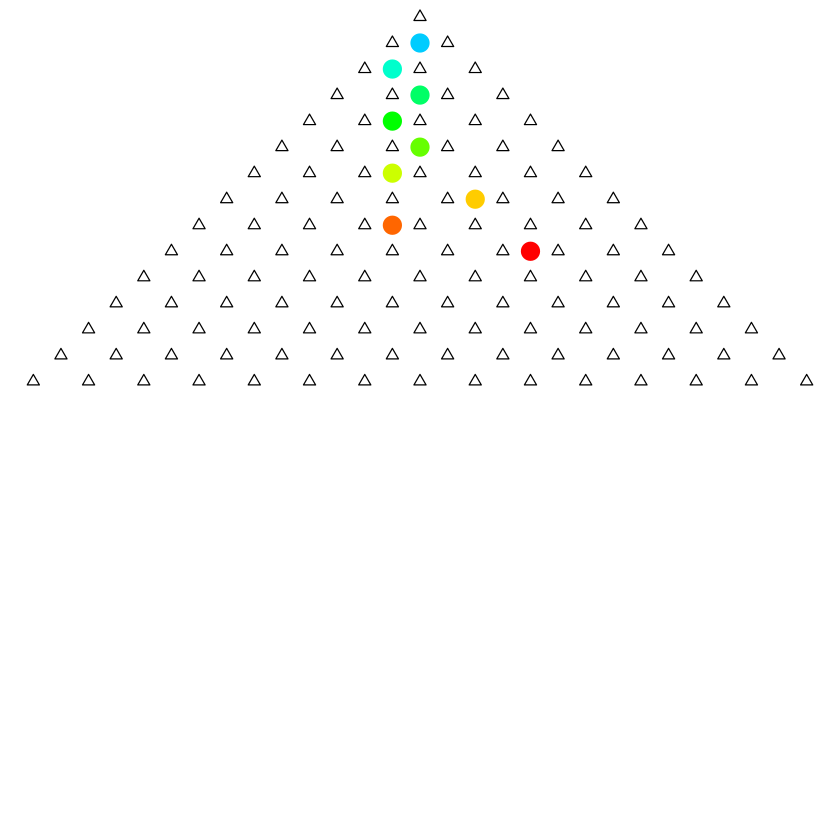

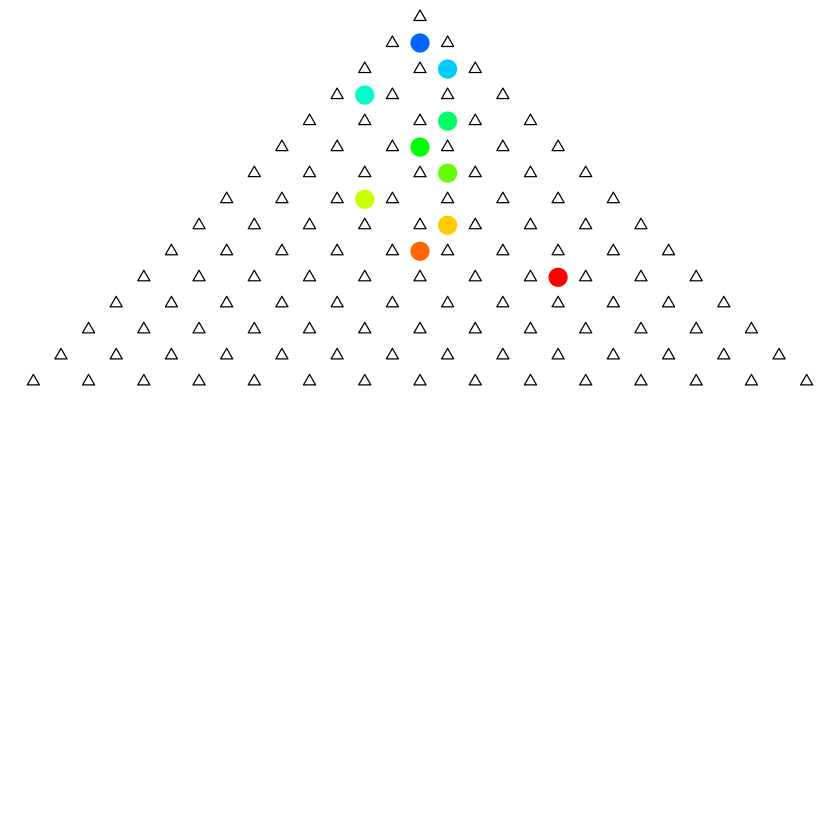

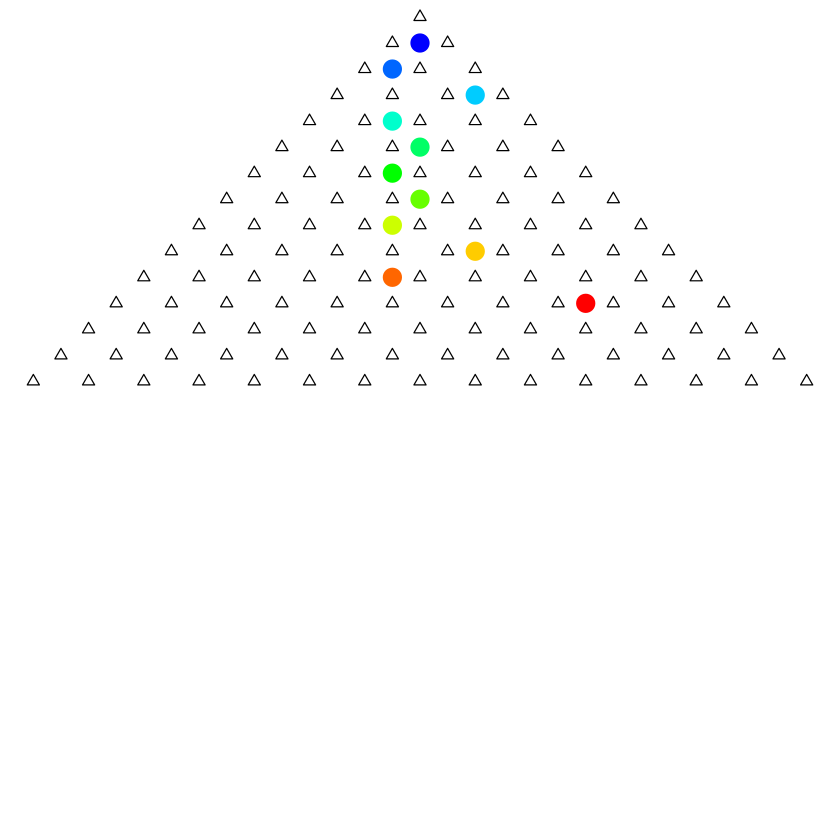

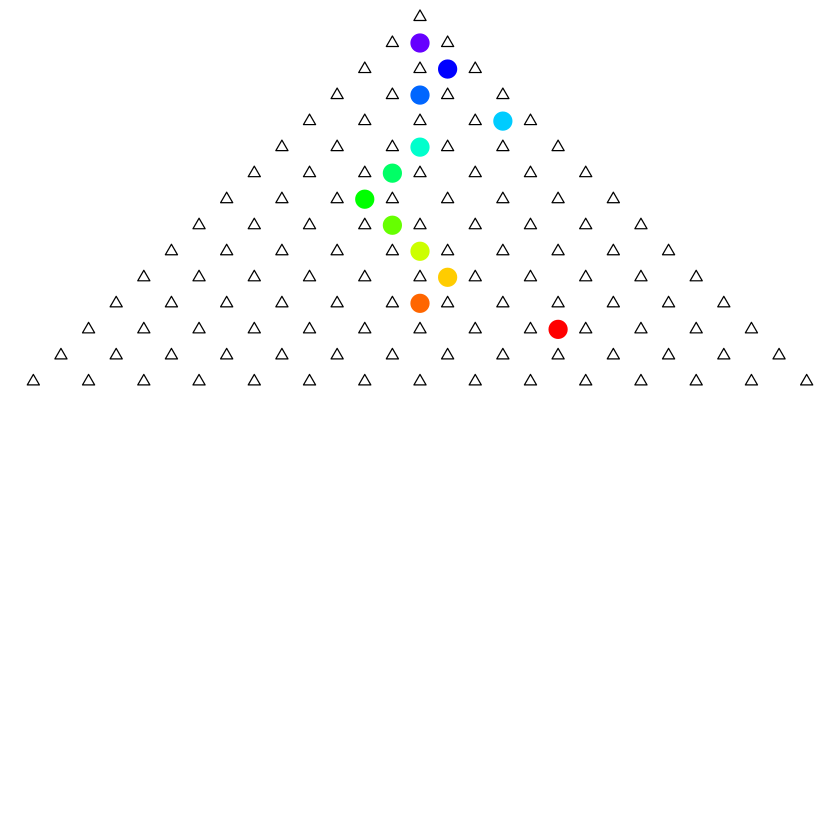

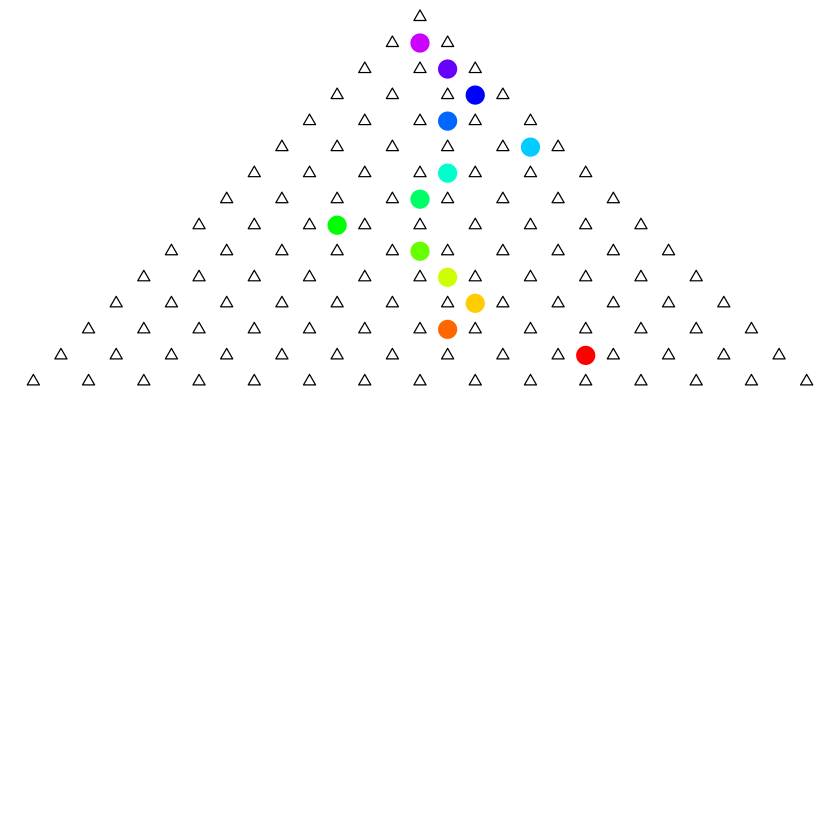

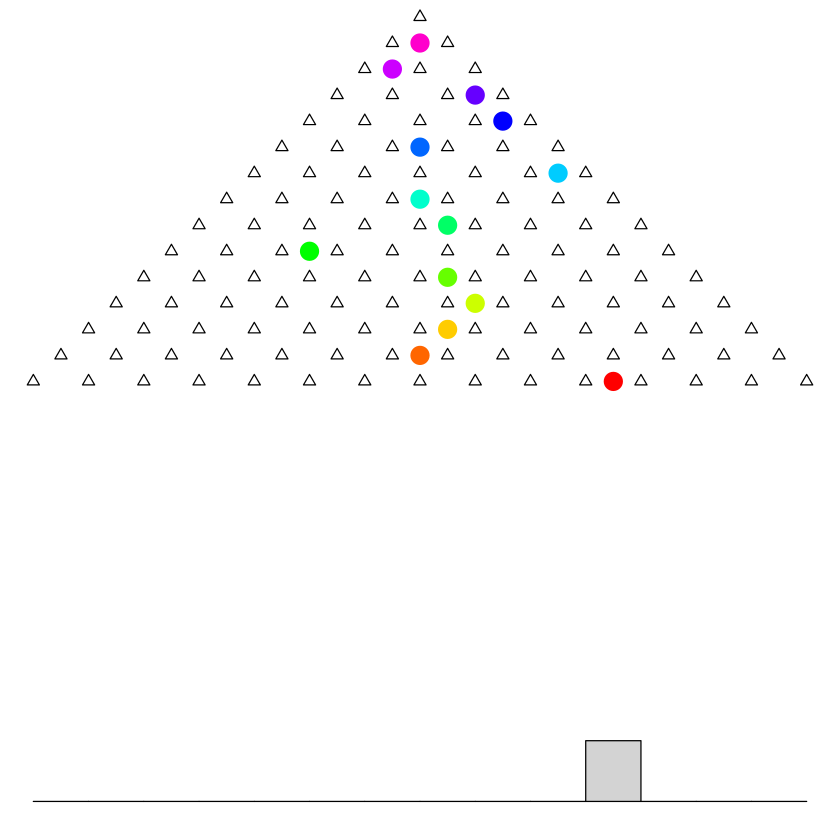

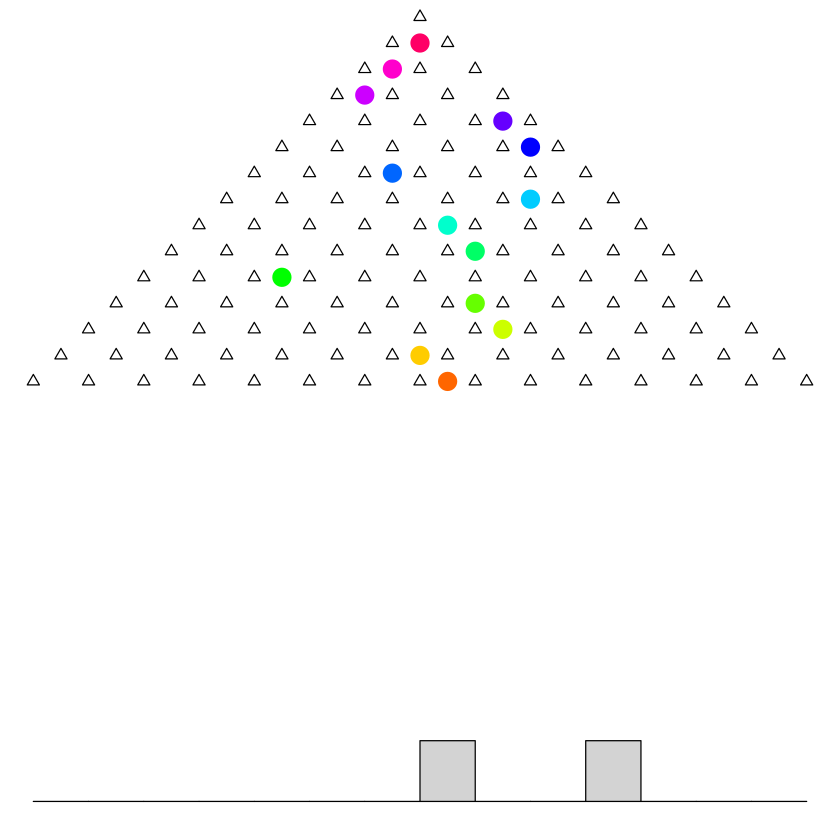

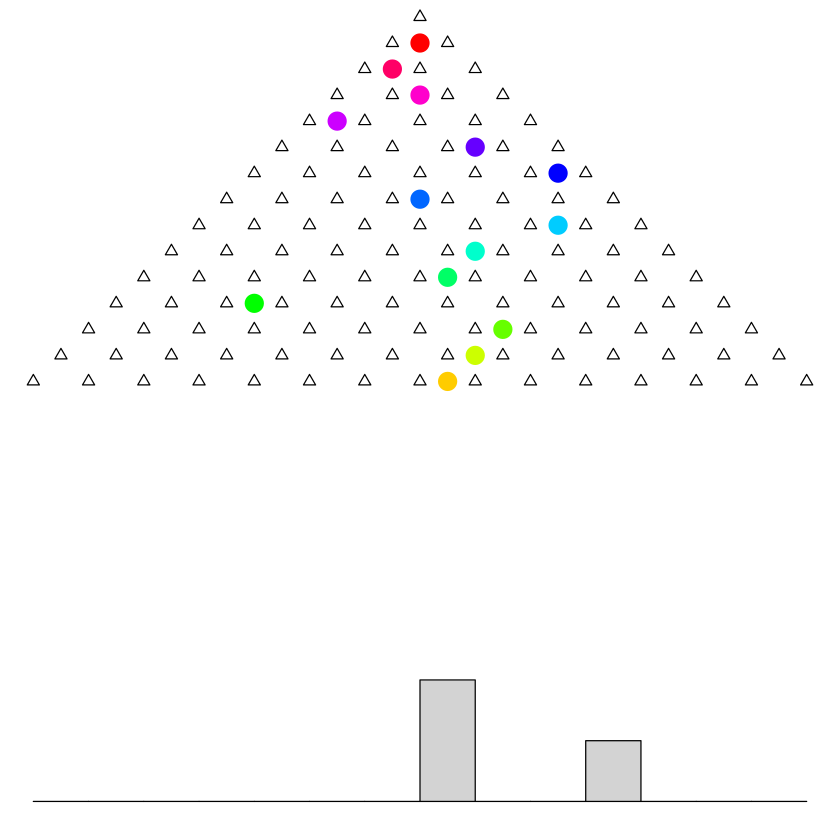

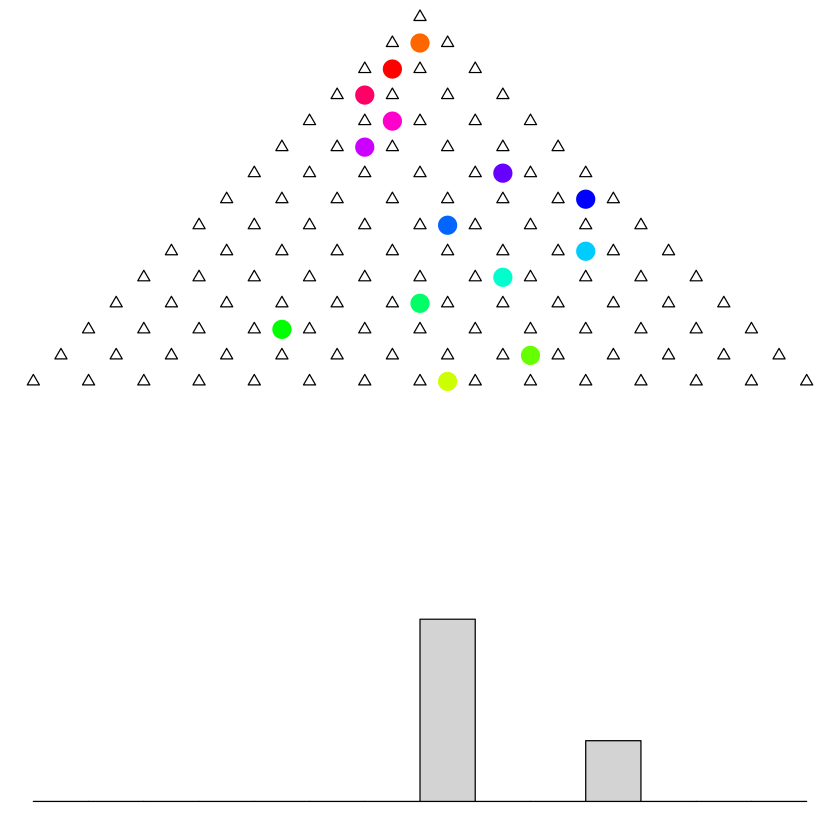

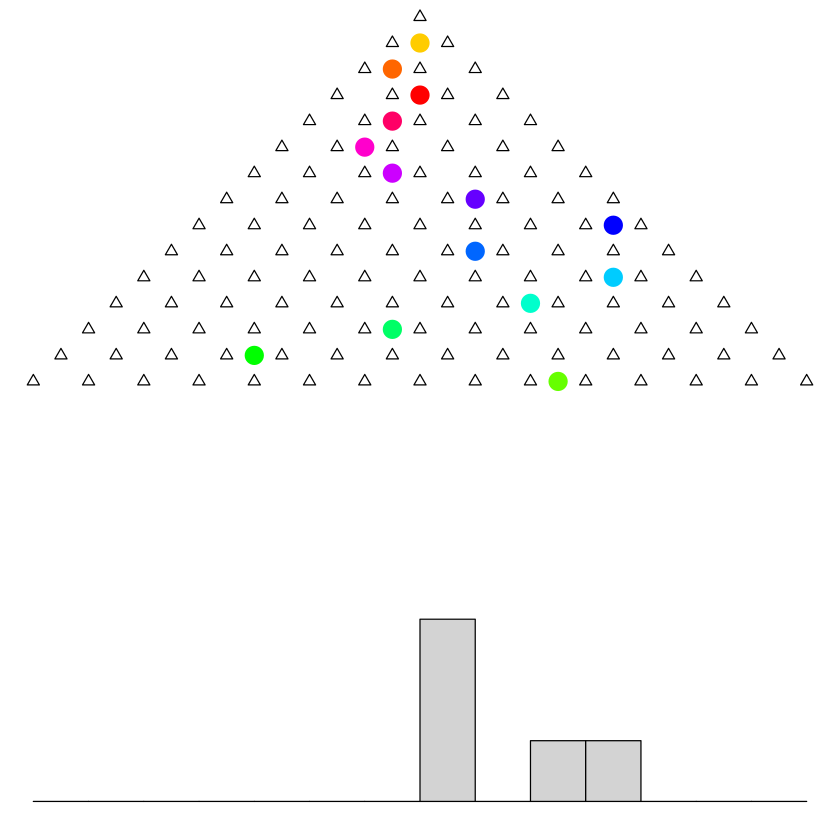

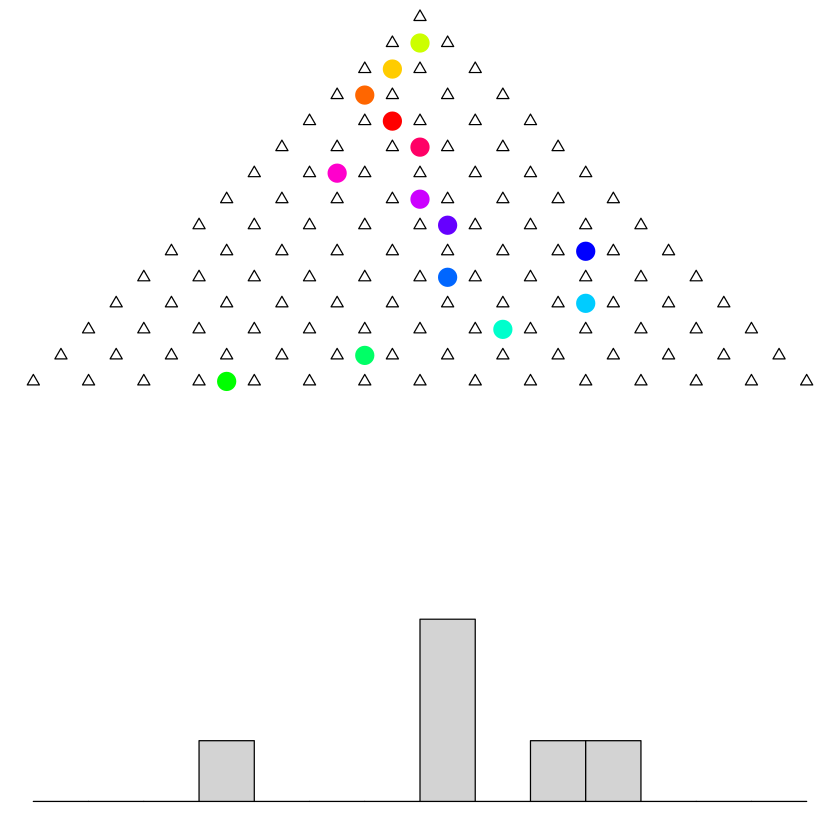

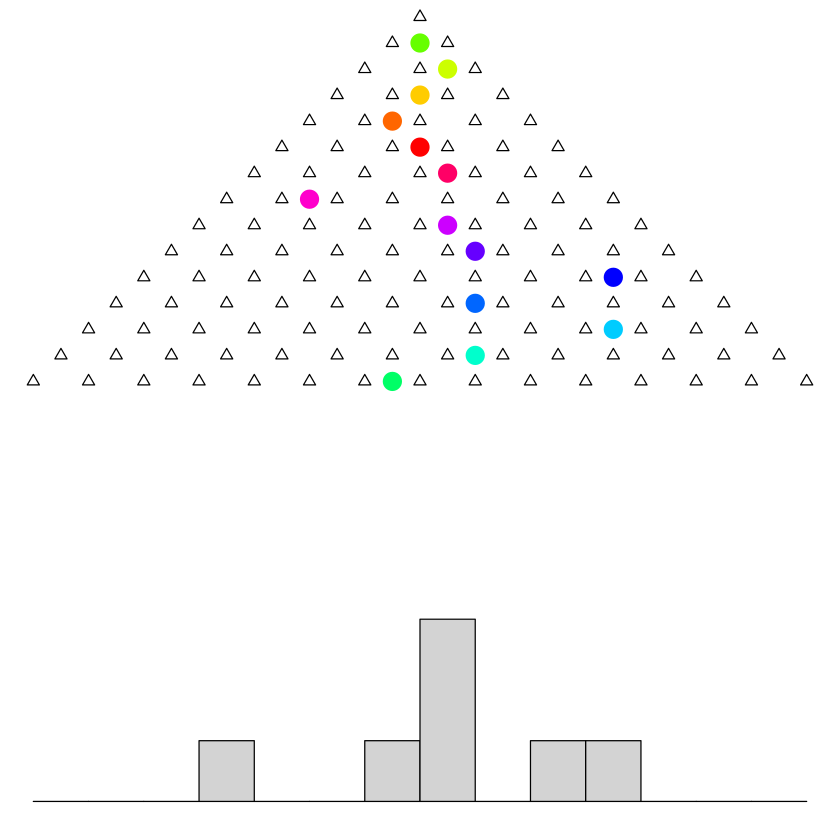

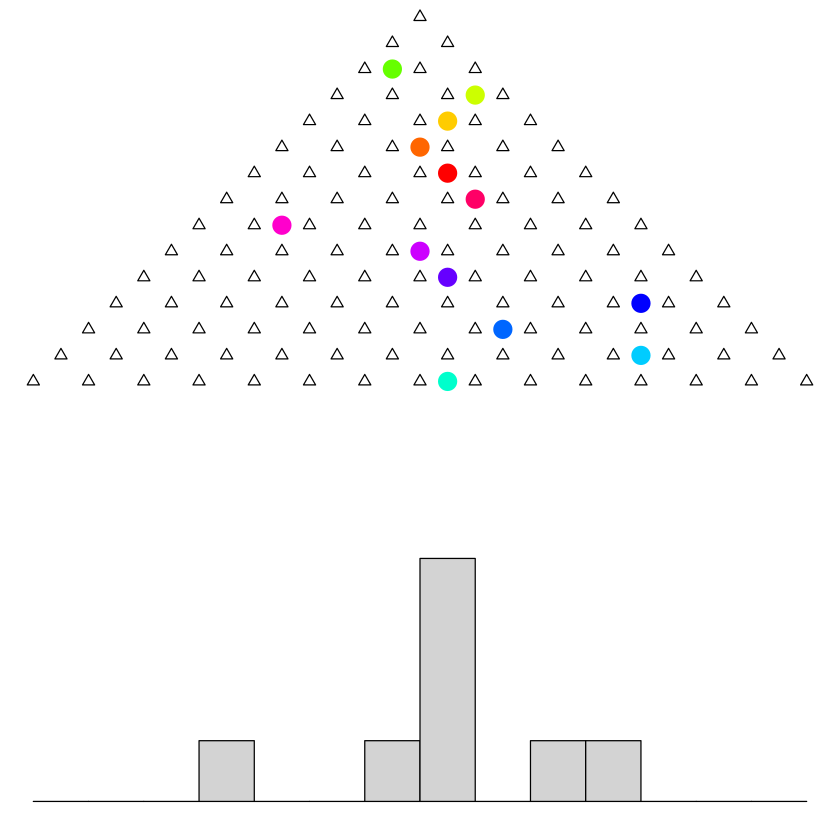

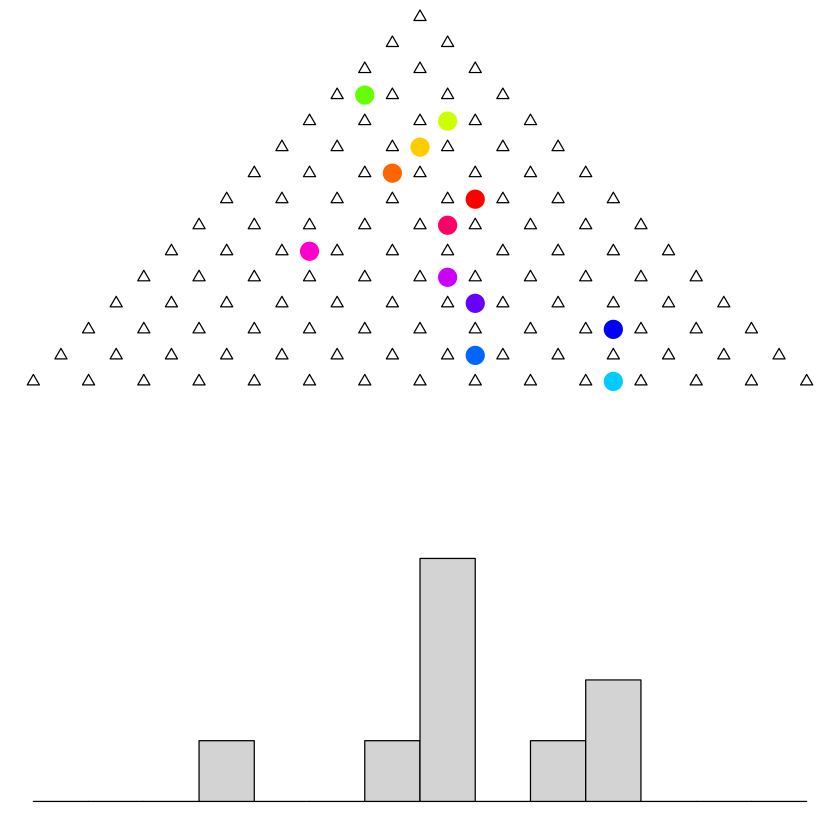

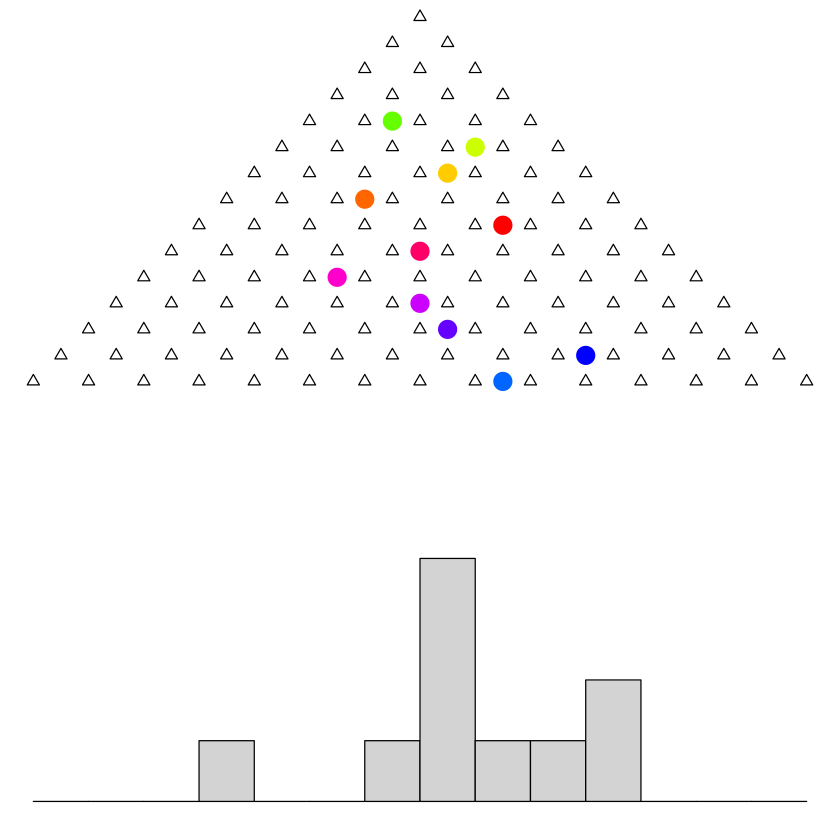

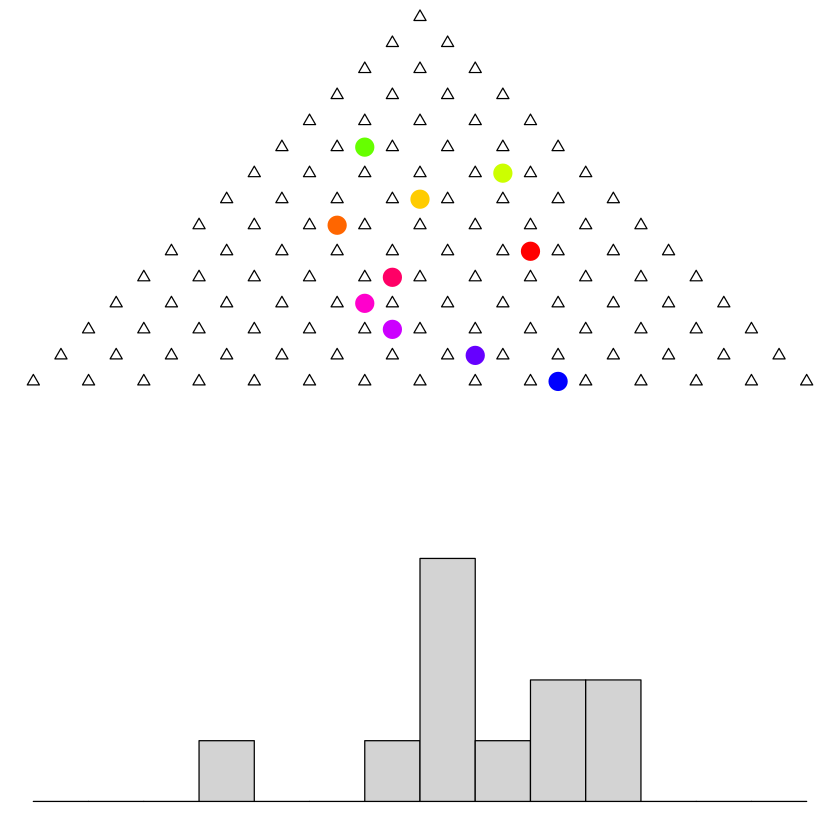

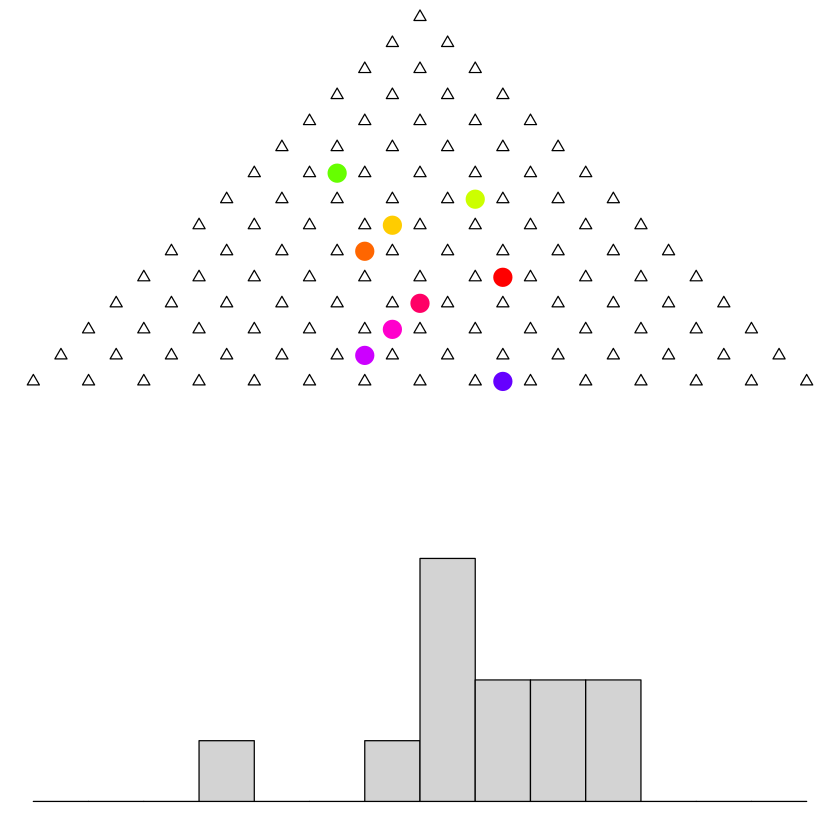

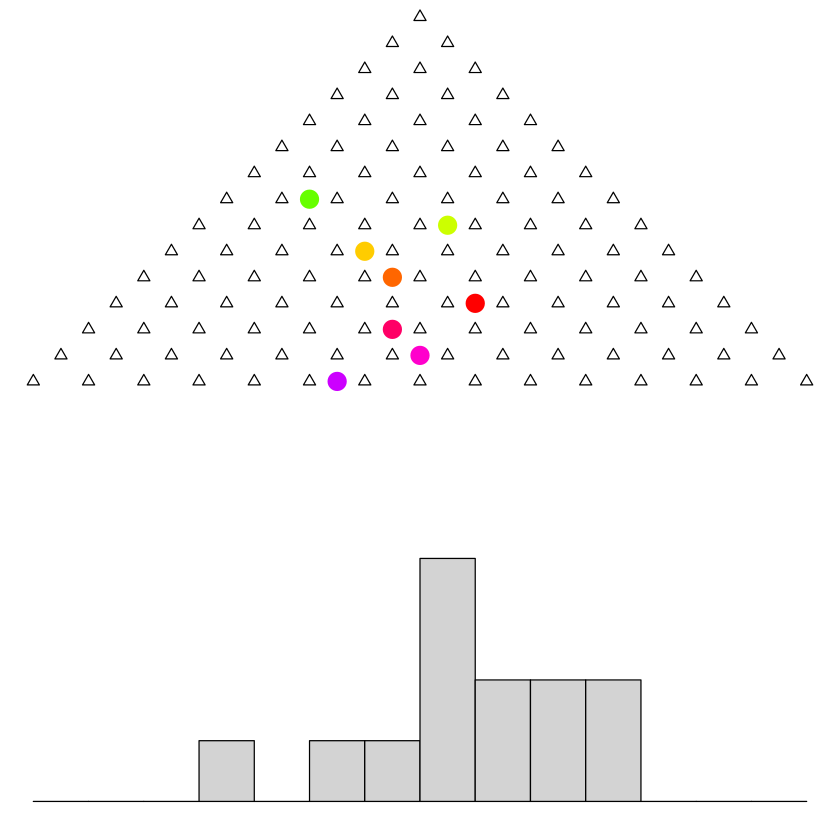

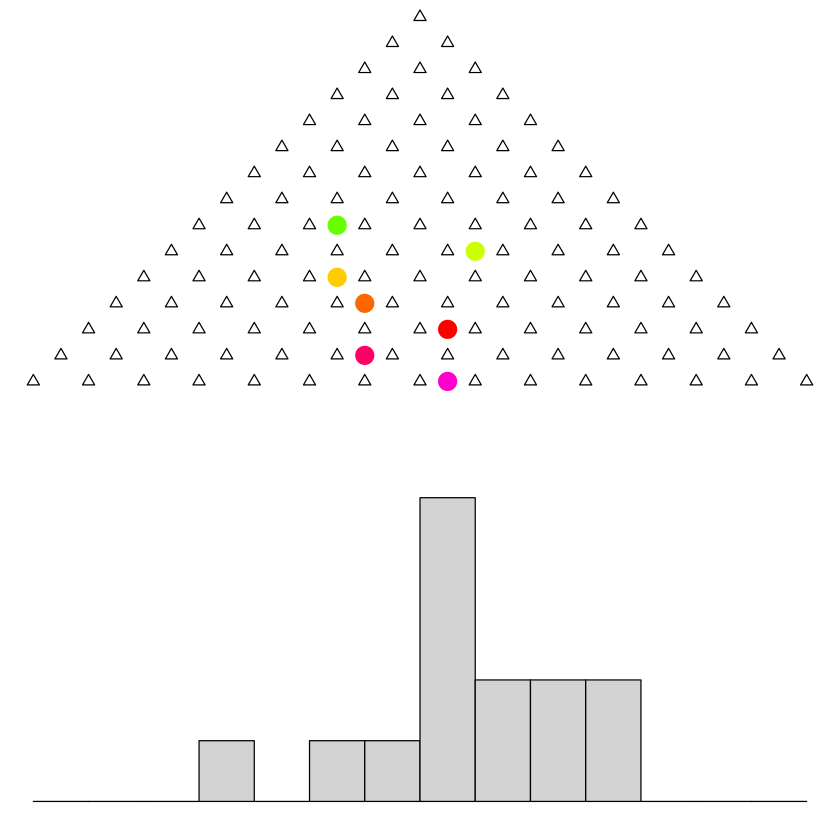

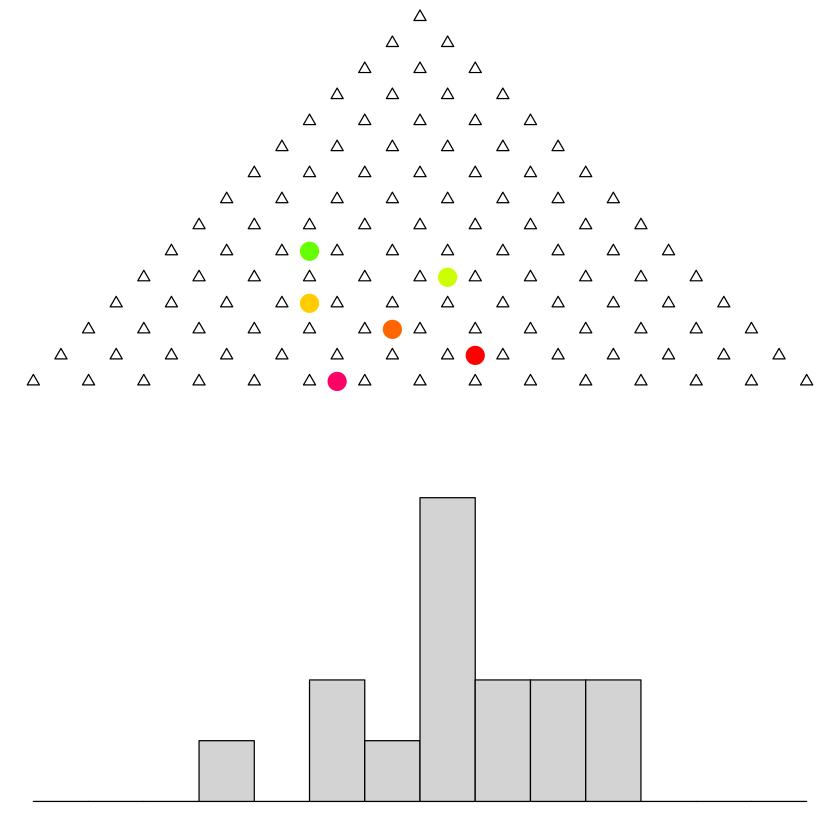

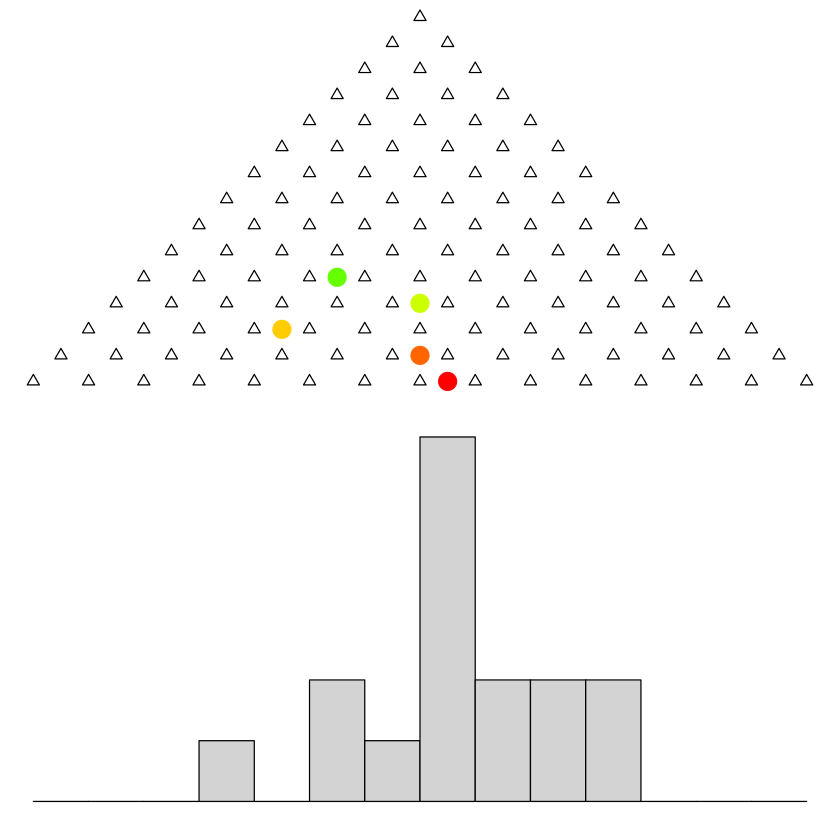

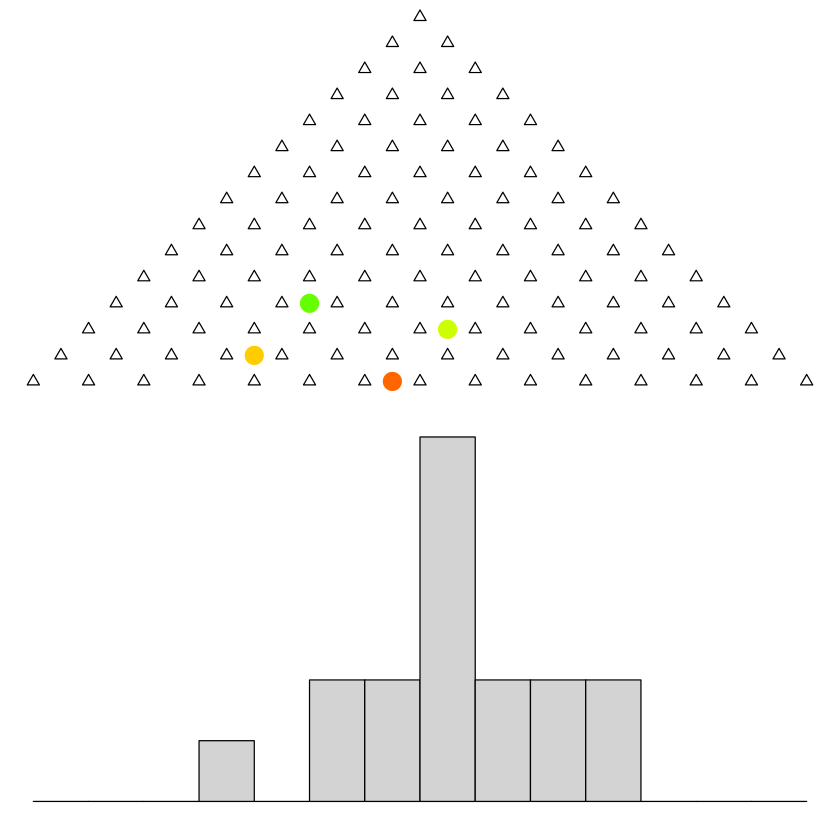

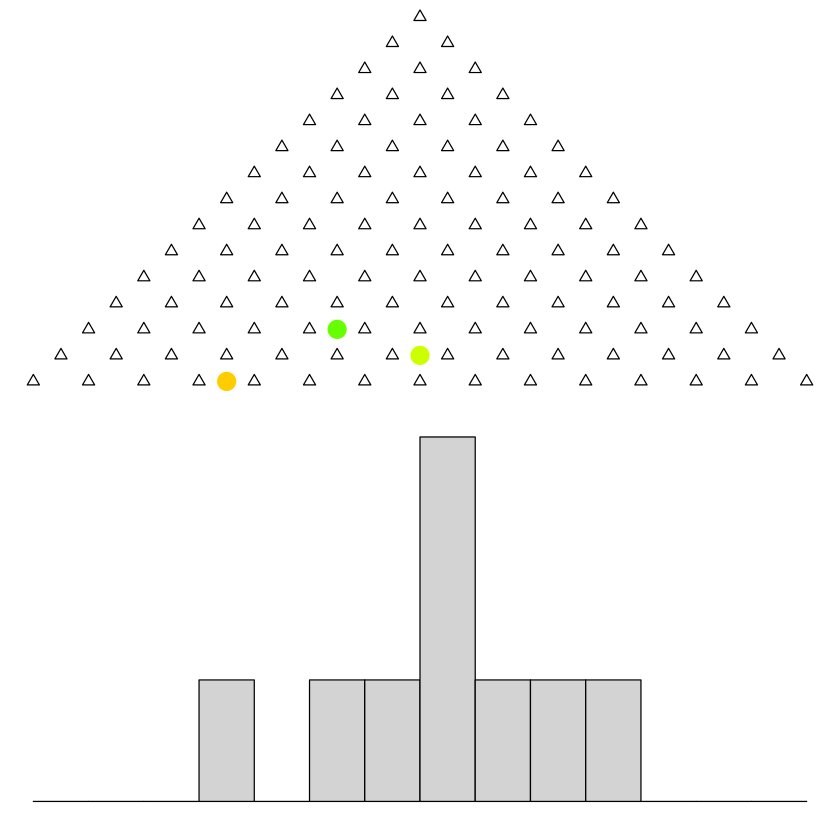

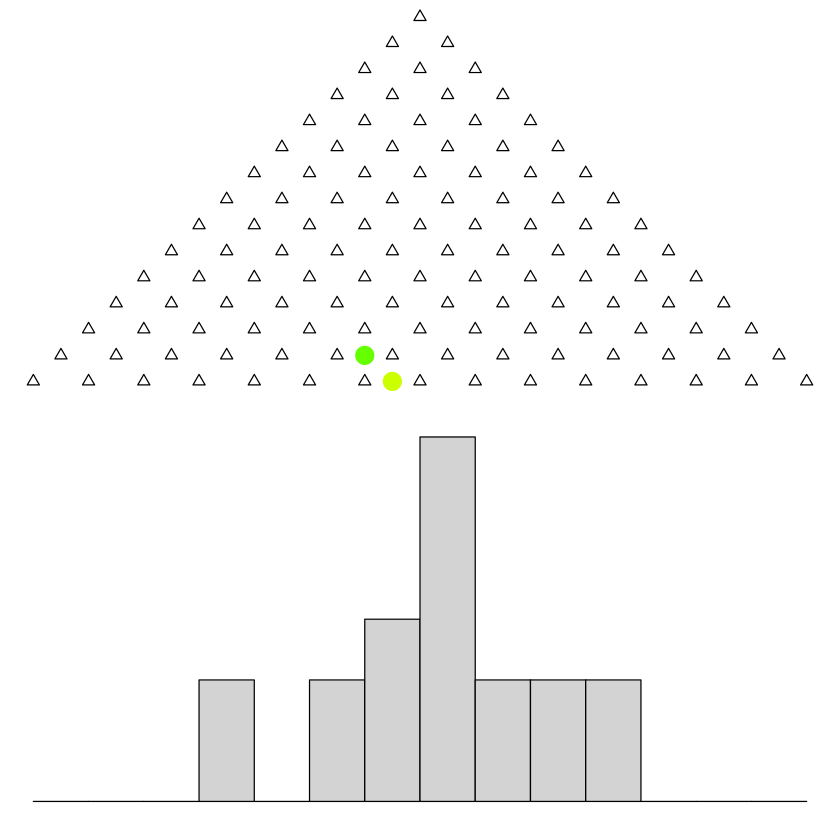

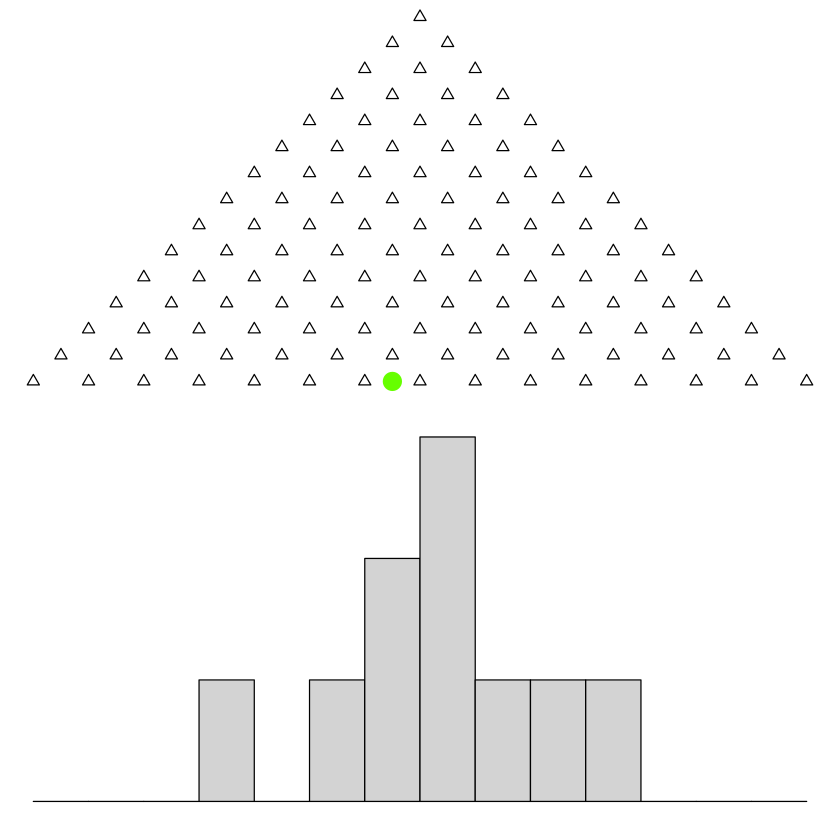

In [13]:
require(animation)
set.seed(42)
balls <- 20 # only put 20 here as otherwise this can take quite.... 
layers<- 15
ani.options(nmax = balls + layers - 2, 2)
galton.sim = quincunx(balls = balls, col.balls = rainbow(layers))

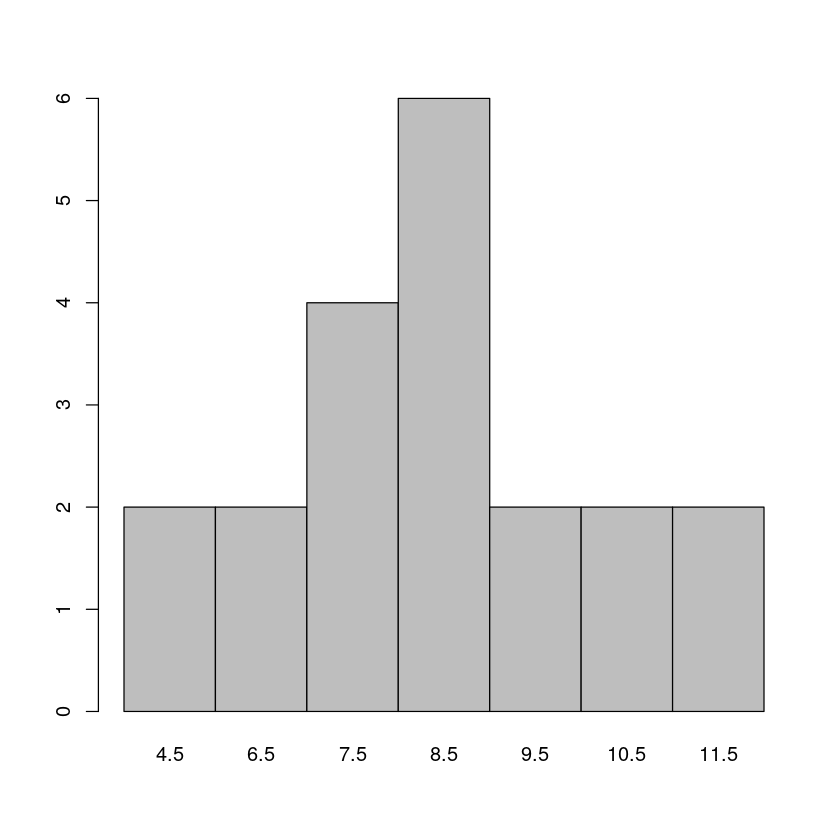

In [14]:
barplot(galton.sim, space = 0)

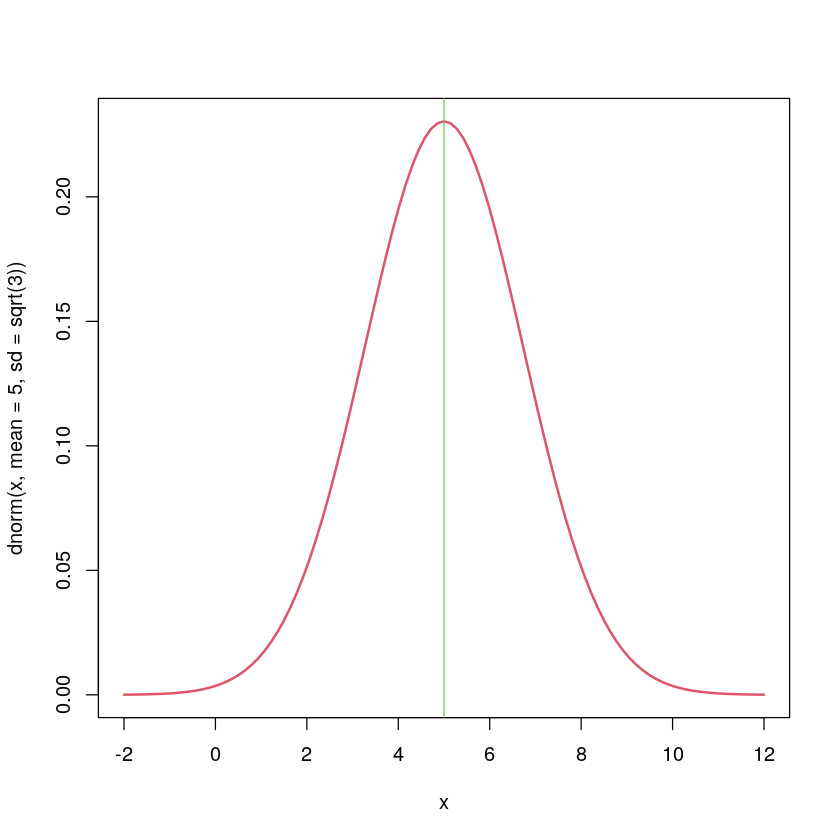

In [15]:
x<- seq(-2,12, length=101)
plot(x, dnorm(x,mean=5, sd=sqrt(3)), type="l", lwd=2, col=2)
abline(v=5, col=3)

Loading required package: mvtnorm



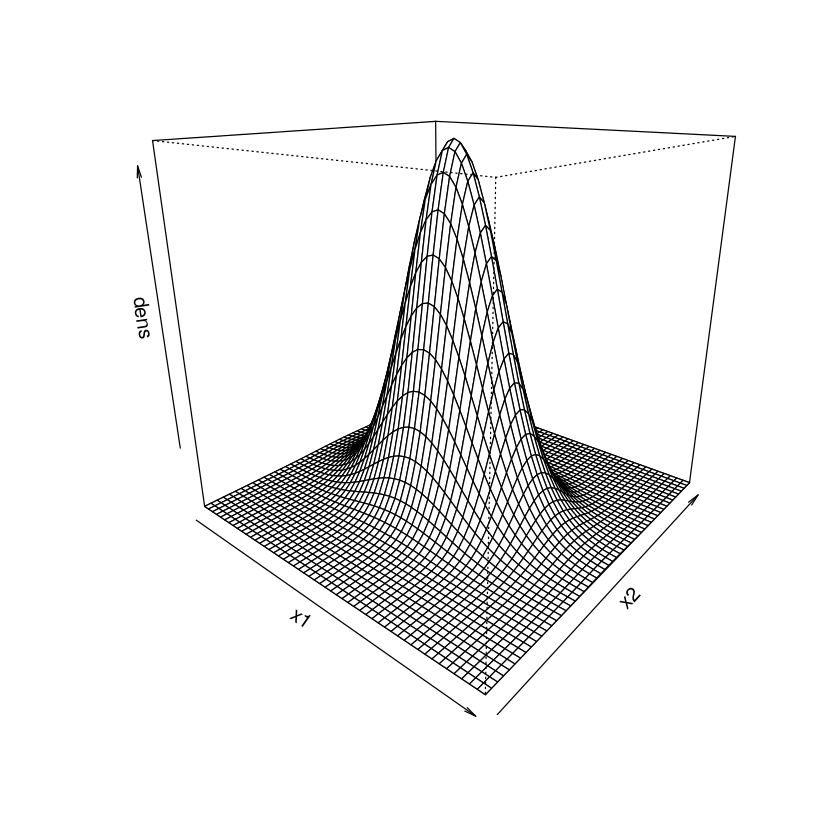

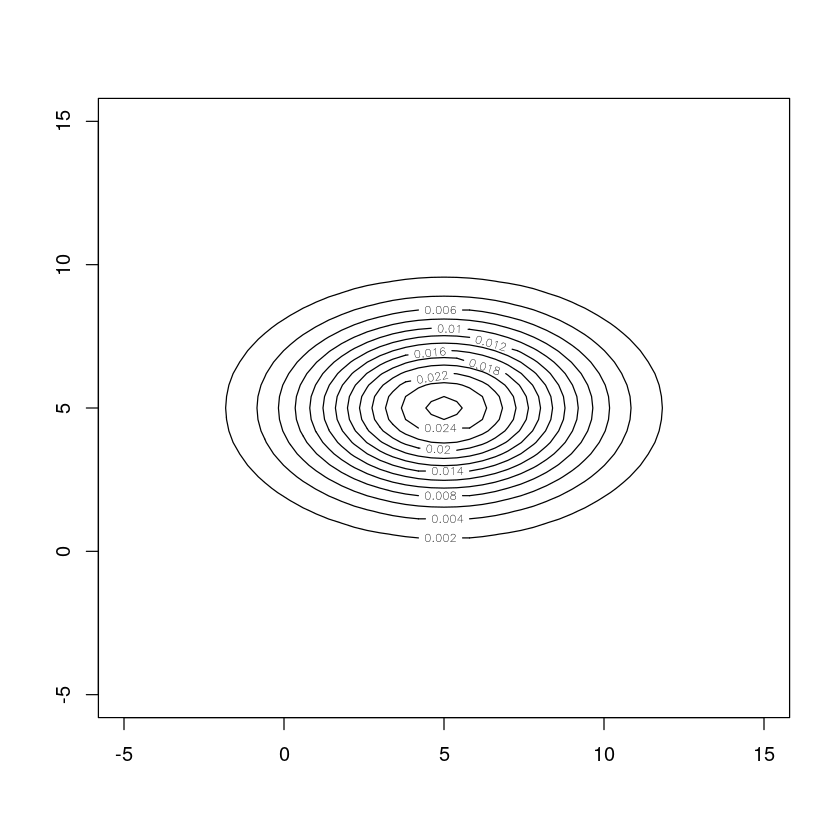

In [16]:
x1    <- seq(-5,15, length=51)   # 51 is an arbitrary grid size
x2    <- seq(-5,15, length=51)
dens <- matrix(0,51,51)

# defines mu and Sigma
mu <- c(5,5)
Sigma <- matrix(c(9,0,0,4), byrow=TRUE, ncol=2)

# fills grid with density values
require(mvtnorm)
for (i in 1:51){
  for (j in 1:51){
    dens[i,j] <- dmvnorm(x=c(x1[i],x2[j]), mean=mu, sigma=Sigma)
  }
}
persp(x1, x2, dens, theta=40, phi=20)  # draws the density in 3D
contour(x1, x2, dens)                  # draws contour plots in 2D

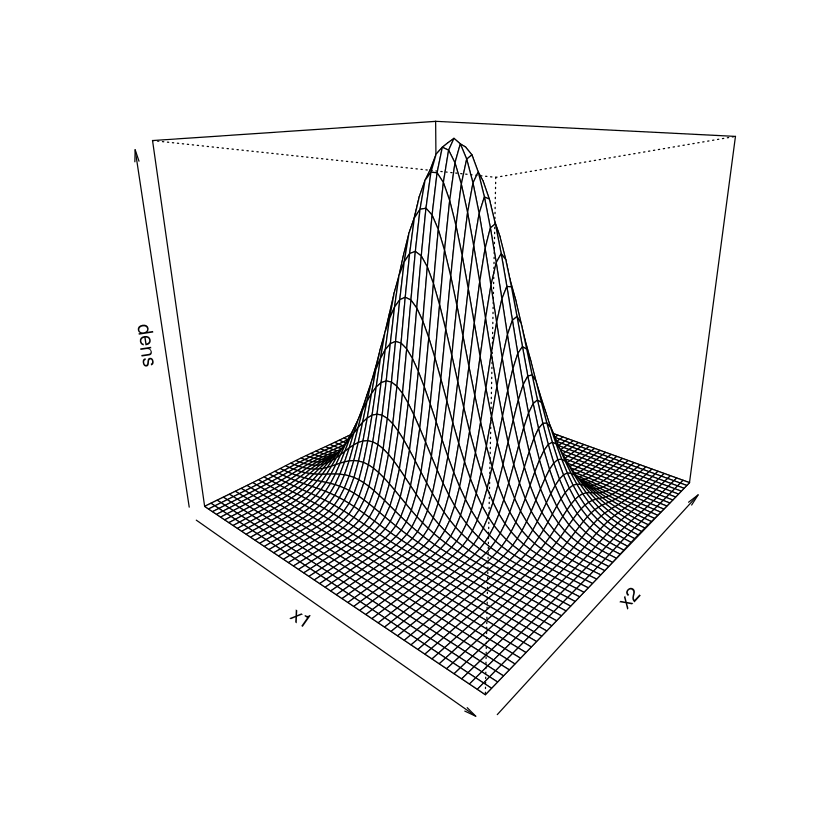

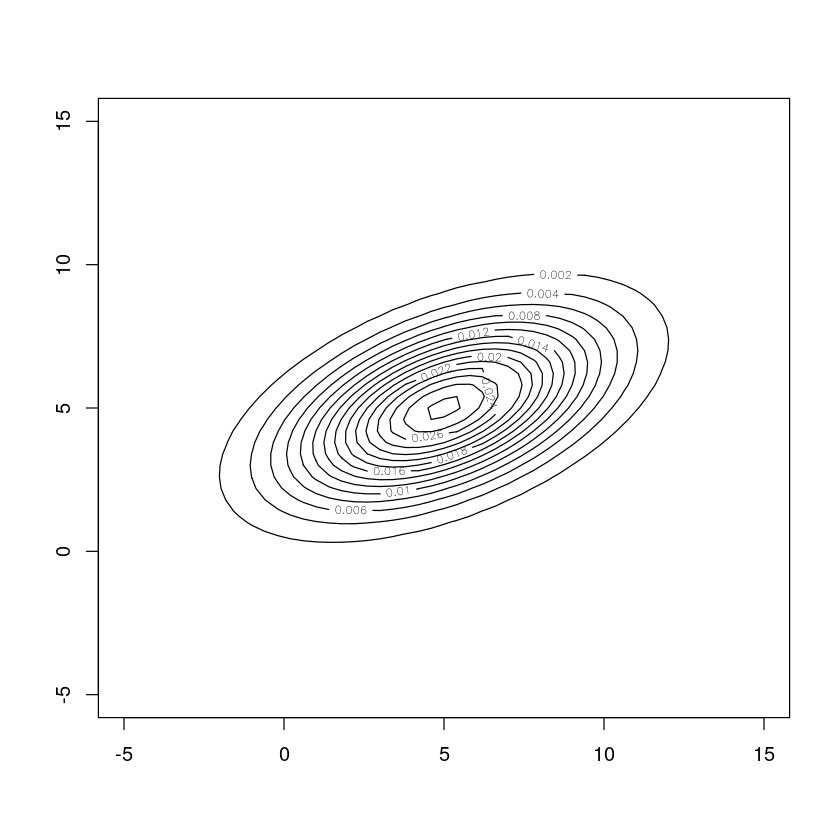

In [17]:
Sigma <- matrix(c(9,3,3,4), byrow=TRUE, ncol=2)
for (i in 1:51){
  for (j in 1:51){
    dens[i,j] <- dmvnorm(x=c(x1[i],x2[j]), mean=mu, sigma=Sigma)
  }
}
persp(x1, x2, dens, theta=40, phi=20)  
contour(x1, x2, dens, nlevels=20 )   

In [18]:
eigen(Sigma)$values

[1] 10.405125  2.594875

In [19]:
wally.m <- colMeans(wally.pts[,c("X","Y")])
wally.S <- var(wally.pts[,c("X","Y")])
wally.Mdist <- mahalanobis(wally.pts[,c("X","Y")], center=wally.m, cov=wally.S)
detect <- which(wally.Mdist>qchisq(0.975,2) )
detect

[1] 1

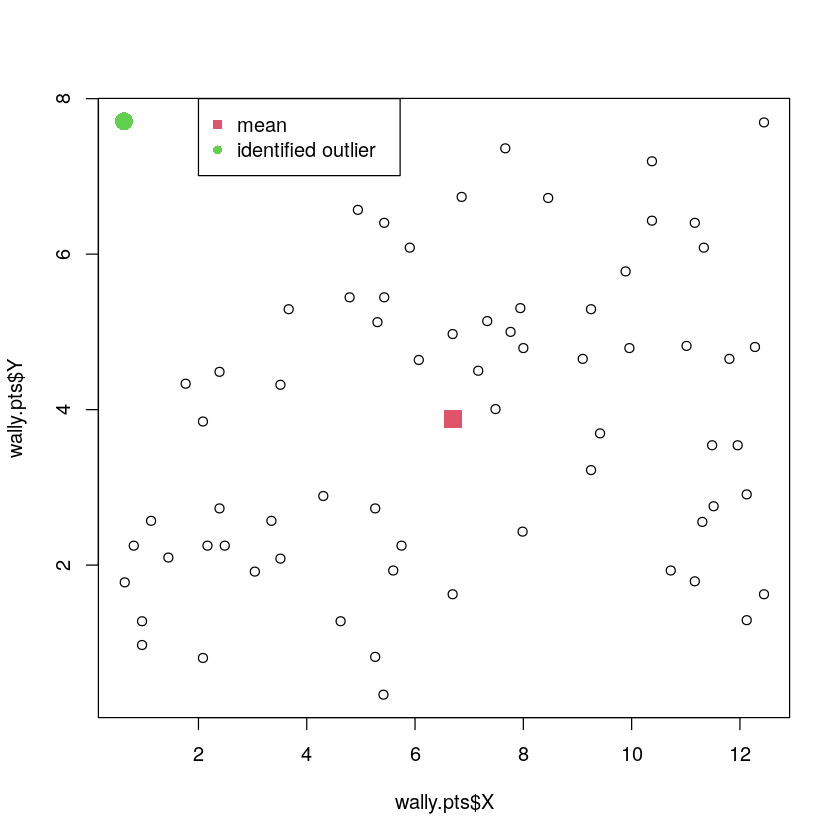

In [20]:
plot(wally.pts$X, wally.pts$Y)
points(wally.m[1], wally.m[2], pch=15, cex=2,col=2 )
points(wally.pts$X[detect], wally.pts$Y[detect], pch=16, col=3, cex=2)
legend(2,8,pch=c(15,16), col=c(2,3),  legend=c("mean", "identified outlier"))

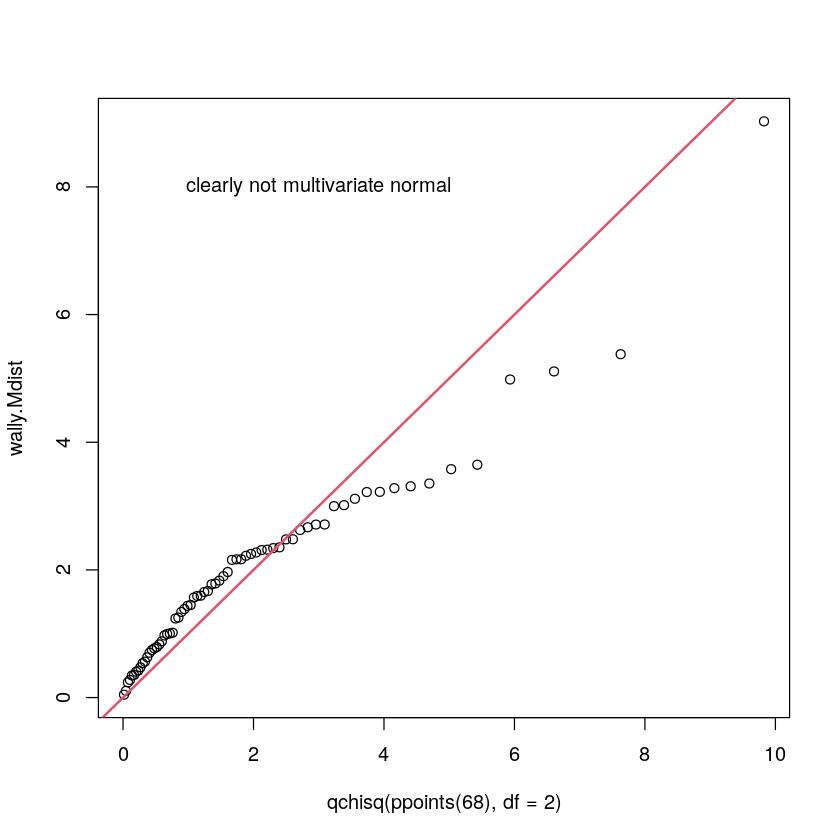

In [21]:
qqplot(qchisq(ppoints(68), df=2),wally.Mdist)
abline(a=0,b=1, col=2, lwd=2)
text(3,8,"clearly not multivariate normal")

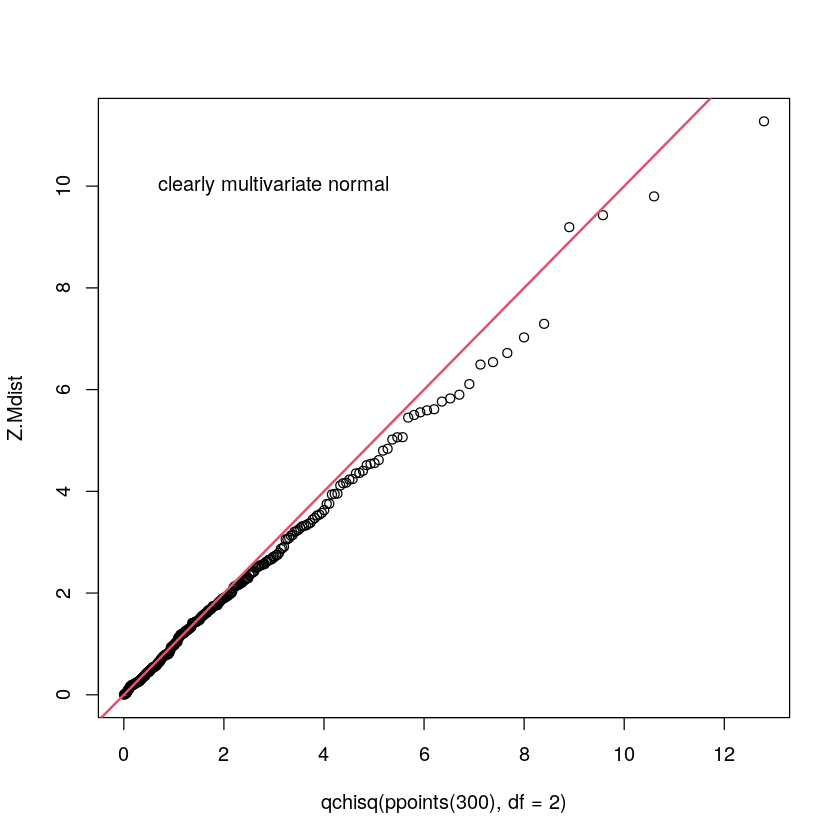

In [22]:
require(mvtnorm)
mu    <- c(5,5)
Sigma <- matrix(c(9,0,0,4), byrow=TRUE, ncol=2)
Z <- rmvnorm(300, mean=mu, sigma=Sigma)
Z.Mdist <- mahalanobis(Z, mu, Sigma)
qqplot(qchisq(ppoints(300), df=2),Z.Mdist)
abline(a=0,b=1, col=2, lwd=2)
text(3,10,"clearly multivariate normal")